## Heart Disease Prediction with KNN
This project analyzes heart disease risk using the K-Nearest Neighbors (KNN) algorithm. Below are the preprocessing steps, model training, and evaluation.


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install seaborn

Imports essential libraries:

 1) pandas: for data manipulation.
 2) numpy: for numerical operations.
 3) matplotlib.pyplot: for plotting.
 4) train_test_split: for splitting the dataset into training and testing sets.
 5) StandardScaler: for normalizing features.
 6) KNeighborsClassifier: for implementing the K-Nearest Neighbors algorithm.
 7) accuracy_score and classification_report: for evaluating the model's performance.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [23]:
df = pd.read_csv("D:\\ML Project\\heart_disease_dataset.csv") 
print(df.head())

# Handle missing values (if any)
df.fillna(df.mean(), inplace=True)

# Feature selection and splitting dataset
X = df.drop(columns=['target'])  # Assuming 'target' column indicates heart disease presence
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


Explanation:

1) Reads the dataset from the specified path.
2) Displays the first few rows of the dataset.
3) Handles missing values by replacing them with the column mean.
4) Splits the dataset into features (X) and target (y).
5) Splits the data into training and testing sets (33% for testing).
6) Normalizes the feature values using StandardScaler.

In [32]:
df.fillna(df.mean(), inplace=True)


The line df.fillna(df.mean(), inplace=True) is used to handle missing values in your dataset. Here's what it does:

Explanation:
1) df.mean(): Calculates the mean of each column in the DataFrame.
              This operation ignores non-numeric columns and focuses only on numeric ones.
2) df.fillna(): Fills all NaN (missing) values in the DataFrame with the specified value (in this case, the column mean).
3) inplace=True: Modifies the original DataFrame directly without creating a new one.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


The line X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) is used to split your dataset into training and testing subsets.

Explanation:
1) train_test_split: A function from sklearn.model_selection that splits arrays or matrices
                    into random train and test subsets.
2) Parameters:  
      1) X: The feature matrix (independent variables).
      2) y: The target vector (dependent variable).
      3) test_size=0.33: Specifies that 33% of the data will be used for testing,and                remaining  67% for training.
      4) random_state=42: Ensures reproducibility by setting a seed for the random number generator.

3) Outputs:

      1) X_train: Training data for features.
      2) X_test: Testing data for features.
      3) y_train: Training data for the target variable.
      4) y_test: Testing data for the target variable.

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)  # Experiment with different values of K
knn.fit(X_train, y_train)

# Make Predictions
y_pred = knn.predict(X_test)


Explanation:

1) Initializes the K-Nearest Neighbors classifier with n_neighbors=5.
2) Trains the model using the training data.
3) Makes predictions on the test data.

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        42
           1       0.89      0.83      0.86        58

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



Explanation:

Calculates the accuracy of the model.
Prints the accuracy score.
Displays a detailed classification report, including precision, recall, and F1-score.


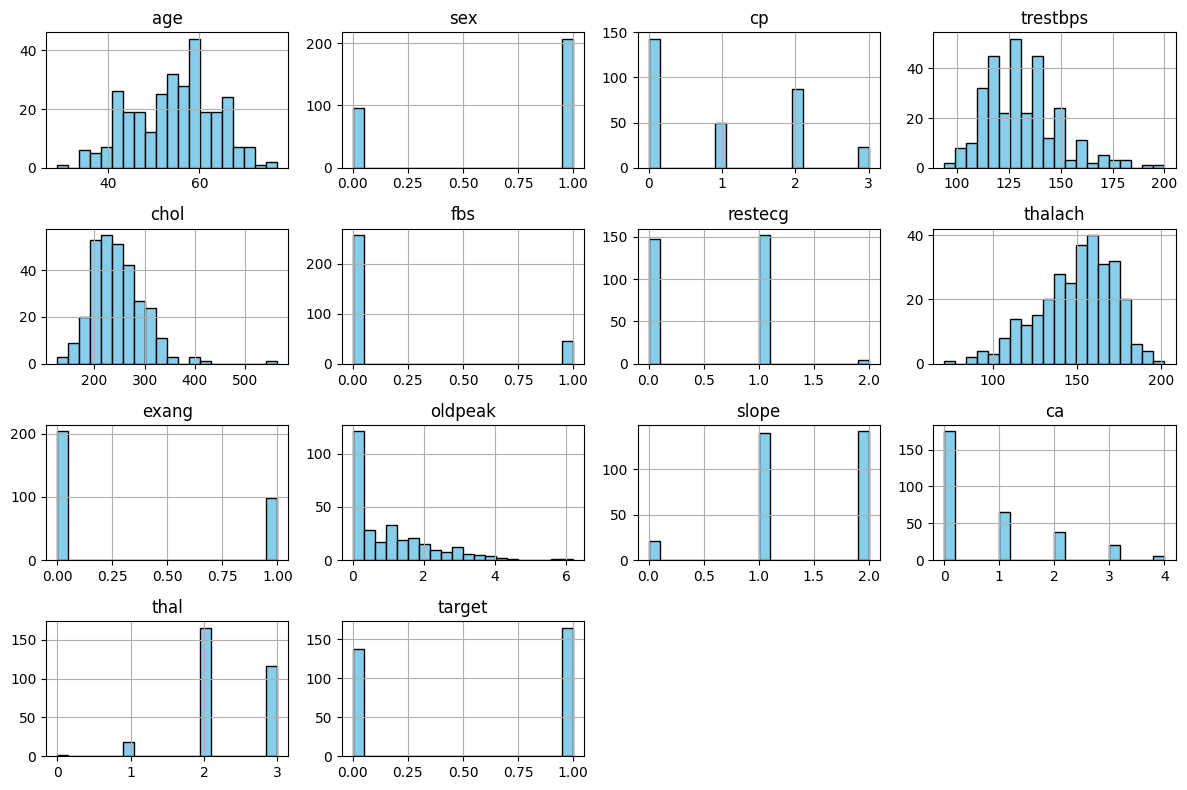

In [29]:
import matplotlib.pyplot as plt

# Set a larger figure size for better clarity
df.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')

# Display the charts
plt.tight_layout()  # Adjusts spacing to prevent overlap
plt.show()

Explanation:
1) figsize=(12, 8): Sets the size of the figure to make the charts larger and more readable.
2) bins=20: Increases the number of bins for better granularity in histograms.
3) color='skyblue' and edgecolor='black': Improves the visual appearance of the bars.
4) plt.tight_layout(): Ensures that the subplots do not overlap.

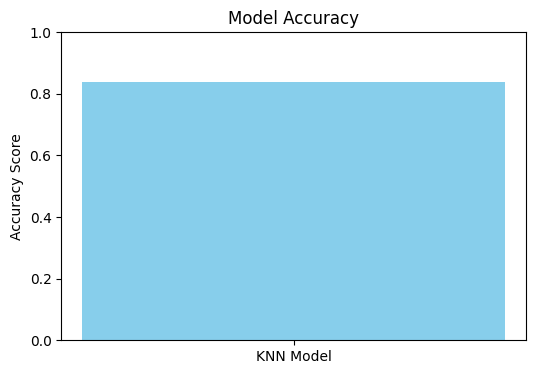

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Model Accuracy Visualization
plt.figure(figsize=(6, 4))
plt.bar(["KNN Model"], [accuracy], color='skyblue')
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()



Explanation:

1) Imports seaborn for visualization and confusion_matrix for evaluation.
2) Creates a bar chart to visualize the model's accuracy.

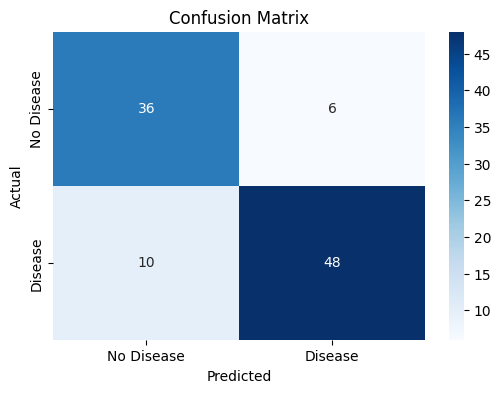

In [15]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Explanation:

Computes the confusion matrix.
Visualizes the confusion matrix using a heatmap to show the model's performance in predicting each class.

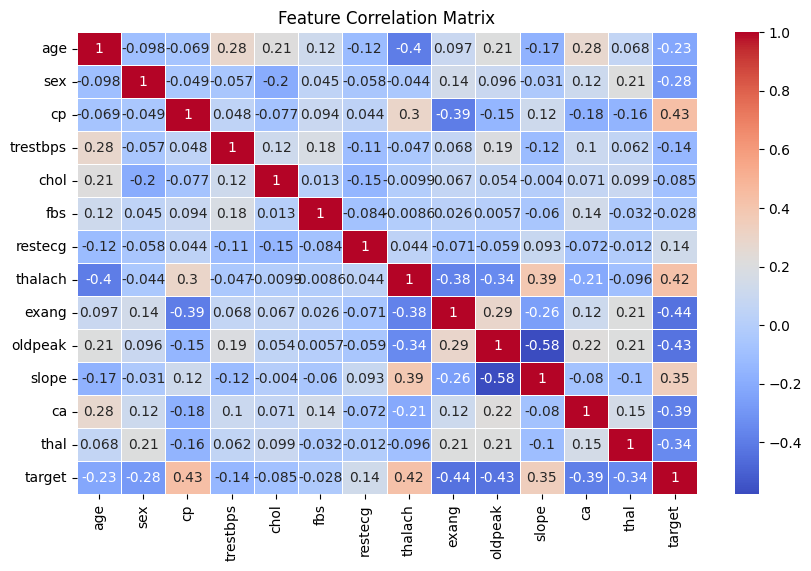

In [16]:
# Feature Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


Explanation:

Computes the correlation matrix of the dataset.
Visualizes the correlation between features using a heatmap.

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 20)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Optimal K Value: {best_k}")


Optimal K Value: 14


Explanation:

1) Performs a grid search to find the optimal value of n_neighbors for the KNN model.
2) Uses cross-validation (cv=5) to evaluate each value of n_neighbors.
3) Prints the best value of K.

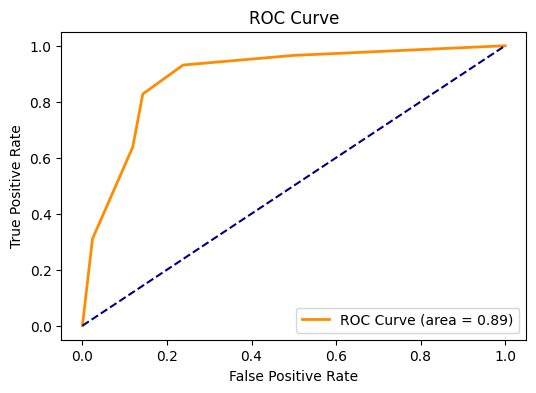

In [18]:
from sklearn.metrics import roc_curve, auc

y_prob = knn.predict_proba(X_test)[:, 1]  # Get probabilities of positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Explanation:

1) Computes the probabilities of the positive class.
2) Calculates the false positive rate (FPR) and true positive rate (TPR) for the ROC curve.
3) Computes the area under the ROC curve (AUC).
4) Plots the ROC curve to evaluate the model's performance.

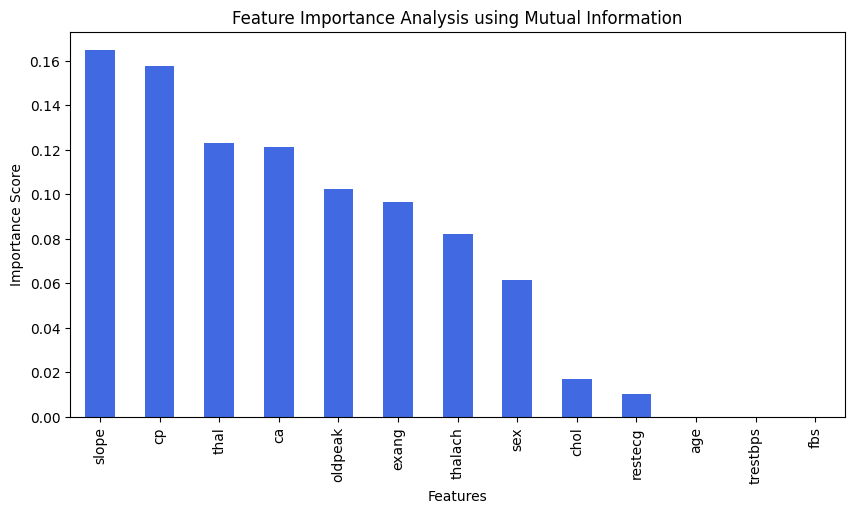

In [19]:
from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(X_train, y_train)
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
feature_importance.plot(kind='bar', color='royalblue')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance Analysis using Mutual Information")
plt.show()


Explanation:

1) Computes the mutual information between features and the target variable.
2) Sorts the features by their importance scores.
3) Visualizes the feature importance using a bar chart.

In [35]:
!jupyter nbconvert --to html Heart_disease_pridict.ipynb

[NbConvertApp] Converting notebook Heart_disease_pridict.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 695691 bytes to Heart_disease_pridict.html


In [ ]:
!pip install voila